In [2]:
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

def integral(Y1,Y2,E1,E2):
    INT=(Y2*E2-Y1*E1)/((np.log(Y2/Y1)/np.log(E2/E1)+1))
    #print(E1,E2,INT)
    return INT

def load_obj(name ):
    with open('C:\\Users\\ginti\\Desktop\\nirs\\' + name + '.pkl', 'rb') as f:
        return pickle.load(f)
    
def Y_NM_Mi20_a(energy,h):
    P=np.sqrt(energy*energy+2*0.938*energy)
    X=np.log(P)
    if energy<1.7:
        a,b,c,d=0.5082, -3.0659, 7.2827, -9.5396
    #if energy<1.6:
    #    a,b,c,d=2.0404,	-8.1776,	12.354,	-11.1
    elif (energy>=1.7 and energy<15):
        a,b,c,d=0.1179,	-1.2022,	4.9329,	-8.65
    else:
        a,b,c,d=0,	-0.0365,	1.206,	-4.763
    LnY1000=a*X*X*X+b*X*X+c*X+d
    Y1000=np.exp(LnY1000)
    A = 9.422E-09*np.power(X,5) - 2.284E-07*np.power(X,4) + 2.037E-06*np.power(X,3) - 7.828E-06*np.power(X,2) + 1.203E-05*np.power(X,1) - 5.545E-06					
    B = -5.351E-06*np.power(X,5) + 1.316E-04*np.power(X,4) - 1.226E-03*np.power(X,3) + 5.176E-03*np.power(X,2) - 1.017E-02*np.power(X,1) + 1.458E-02				
    alt_dep=(1000-h)*(1000-h)*A+(1000-h)*B
    Y=Y1000*np.exp(alt_dep)
    return Y

def Y_NM_Mi20_p(energy,h):
    P=np.sqrt(energy*energy+2*0.938*energy)
    X=np.log(P)
    #if energy<1.25:
    #    a,b,c,d=6.09,	-14.06,	13.98,	-11.615
    if energy<1.28:
        a,b,c,d=0,	-8.6616,	13.879,	-12.104
    elif energy >=1.28 and energy<10:
        a,b,c,d=-0.186,	0.428,	2.831,	-8.76
    else:
        a,b,c,d=0,	-0.0365,	1.206,	-4.763
    LnY1000=a*X*X*X+b*X*X+c*X+d
    Y1000=np.exp(LnY1000)
    A= 6.945E-09*np.power(X,5) - 1.461E-07*np.power(X,4) + 1.115E-06*np.power(X,3) - 3.402E-06*np.power(X,2) + 3.355E-06*np.power(X,1) - 9.823E-07
    B= -3.963E-06*np.power(X,5) + 8.091E-05*np.power(X,4) - 6.394E-04*np.power(X,3) + 2.348E-03*np.power(X,2) - 4.713E-03*np.power(X,1) + 1.186E-02
    alt_dep=(1000-h)*(1000-h)*A+(1000-h)*B
    Y=Y1000*np.exp(alt_dep)
    return Y

data_protons = load_obj('AMS_spec_p')

data_he = load_obj('AMS_spec_he')

iheavy = open('C:\\Users\\ginti\\Desktop\\nirs\\heavy.txt','r')
linesiheavy = iheavy.readlines()
heavy = []
for x in linesiheavy:
    heavy.append(x.split()[1])
iheavy.close()

pr = []
s1 = 0
he = []
s2 = 0

pc = []
for i in range(0,16):
    pc.append(i)

depth = []
for i in range(600, 1020, 50):
    depth.append(i)

for i in pc:
    for h in depth:
        for k in range(5,71):
            if float(data_protons[2426].iloc[[k], [0]].values) > i:            
                a = float(data_protons[2426].iloc[[k], [4]].values)
                b = Y_NM_Mi20_p(a,h) * float(data_protons[2426].iloc[[k], [6]].values)
                c = float(data_protons[2426].iloc[[k+1], [4]].values)
                d = Y_NM_Mi20_p(c,h) * float(data_protons[2426].iloc[[k+1], [6]].values)
                s1 += integral(b, d, a, c)
        pr.append(s1)
        s1 = 0
        for k in range(0,66):        
             if float(data_he[2426].iloc[[k], [0]].values) > i:
                a = float(data_he[2426].iloc[[k], [4]].values)
                b = Y_NM_Mi20_a(a,h) * float(data_he[2426].iloc[[k], [6]].values) * (1 + float(heavy[k]))
                c = float(data_he[2426].iloc[[k+1], [4]].values)
                d = Y_NM_Mi20_a(c,h) * float(data_he[2426].iloc[[k+1], [6]].values)  * (1 + float(heavy[k]))
                s2 += integral(b, d, a, c)
        he.append(4*s2)
        s2 = 0

n = []

for i in range(len(he)):
    nh = he[i] / (pr[i] + he[i])
    n.append(nh)
    
print(pc, depth, n)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15] [600, 650, 700, 750, 800, 850, 900, 950, 1000] [0.3386352707756854, 0.33246035926144357, 0.32757424471817564, 0.3239229003143304, 0.3214444689175088, 0.3200707786484381, 0.31972775782475515, 0.3203344222652284, 0.32179997399634014, 0.3386352707756854, 0.33246035926144357, 0.32757424471817564, 0.3239229003143304, 0.3214444689175088, 0.3200707786484381, 0.31972775782475515, 0.3203344222652284, 0.32179997399634014, 0.3386352707756854, 0.33246035926144357, 0.32757424471817564, 0.3239229003143304, 0.3214444689175088, 0.3200707786484381, 0.31972775782475515, 0.3203344222652284, 0.32179997399634014, 0.34551582169918, 0.33865337104268683, 0.3332542621572726, 0.32921519346010286, 0.32643556111689437, 0.3248178007337284, 0.3242663187890045, 0.32468489042744325, 0.3259722097604025, 0.35062067179924283, 0.3436385860295456, 0.33818964846234495, 0.33414521628809796, 0.33138555505393336, 0.32979888915671174, 0.32927912495508577, 0.329722165093791

In [3]:
body = list()
for i in range(len(pc)):
    col = list()
    for j in range(len(depth)):
        col.append(n[i*len(depth)+j])
    body.append(col)
df = pd.DataFrame(body, columns=depth)

In [4]:
df

,600,650,700,750,800,850,900,950,1000
0,0.338635,0.332460,0.327574,0.323923,0.321444,0.320071,0.319728,0.320334,0.321800
1,0.338635,0.332460,0.327574,0.323923,0.321444,0.320071,0.319728,0.320334,0.321800
2,0.338635,0.332460,0.327574,0.323923,0.321444,0.320071,0.319728,0.320334,0.321800
3,0.345516,0.338653,0.333254,0.329215,0.326436,0.324818,0.324266,0.324685,0.325972
4,0.350621,0.343639,0.338190,0.334145,0.331386,0.329799,0.329279,0.329722,0.331021
5,0.354612,0.347722,0.342362,0.338398,0.335707,0.334175,0.333695,0.334160,0.335462
6,0.360090,0.353359,0.348115,0.344227,0.341574,0.340046,0.339537,0.339942,0.341150
7,0.367555,0.361037,0.355920,0.352083,0.349415,0.347810,0.347166,0.347380,0.348343
8,0.372261,0.365859,0.360801,0.356971,0.354265,0.352579,0.351816,0.351872,0.352637
9,0.383804,0.377647,0.372689,0.368830,0.365978,0.364038,0.362917,0.362515,0.362720


In [ ]:
a=input()
a=a.replace(',',' ')
a=a.replace('(','')
a=a.replace(')','')
t1=0; t2=2; t3=t1; t4=t2
mylist=list(map(int,a.split()))
r1=((mylist[t1]-mylist[t2])**2+(mylist[t1+1]-mylist[t2+1])**2)**0.5
r2=r1
for i in range(0,len(mylist)-3,2):
    for j in range(i + 2, len(mylist) - 1, 2):
        a=((mylist[i]-mylist[j])**2+(mylist[i+1]-mylist[j+1])**2)**0.5
        if a<r1: r1=a; t1=i;t2=j
        elif a>r2: r2=a;t3=i;t4=j
print('(',mylist[t4],',',mylist[t4+1],')',' ','(',mylist[t3],',',mylist[t3+1],')',sep='')
print('(',mylist[t2],',',mylist[t2+1],')',' ','(',mylist[t1],',',mylist[t1+1],')',sep='')

<AxesSubplot:>

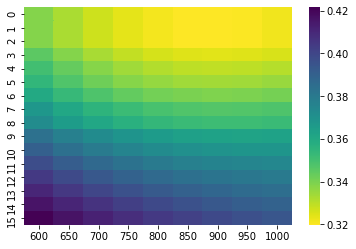

In [16]:
sb.color_palette("crest", as_cmap=True)
sb.heatmap(df, cmap=colormap)